# Gradient Descent - Regression

## Introduction

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (error).

It's iterative in nature; starting from a random point on the function curve, it moves towards the minimum value of the curve by taking steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

If correctly implemented, it can efficiently find the minimum of a wide range of functions, making it particularly useful in training machine learning models like linear regression and neural networks.

## Algorithm

Gradient descent regression is a method used to minimize the cost function in regression models, particularly when dealing with large datasets where traditional methods like ordinary least squares would be computationally expensive. Here's an overview of the algorithm:

1. Initialization: The process begins by initializing the regression coefficients (weights) to random values or zeros. This starting point determines the first step the algorithm will take in the cost function landscape.

2. Cost Function: In regression, the cost function is usually the Mean Squared Error (MSE), which calculates the average of the squares of the differences between the predicted and actual values. The goal of gradient descent is to minimize this MSE.
3. Gradient Calculation: The gradient of the cost function with respect to each coefficient is calculated. This gradient is a vector that points in the direction of the steepest ascent of the cost function. Since the goal is to minimize the cost, gradient descent moves in the opposite direction.
4. Updating Coefficients: The weights are updated by subtracting the product of the learning rate (a small, positive number) and the gradient from them. The learning rate determines the size of the steps taken towards the minimum; too small a rate slows down the convergence, while too large a rate can overshoot the minimum.
5. Iteration: Steps 3 and 4 are repeated iteratively. In each iteration, the weights are adjusted slightly in the direction that reduces the cost function, progressively moving towards the minimum.
6. Convergence: The algorithm converges when the cost function stops decreasing significantly, or a predetermined number of iterations is reached.
7. Stochastic and Mini-batch Variants: In standard gradient descent, the gradient is calculated from the entire dataset, which can be computationally heavy. Stochastic Gradient Descent (SGD) mitigates this by calculating the gradient and updating weights using just one data point at a time. Mini-batch gradient descent strikes a balance by using a subset of the data for each update, offering efficiency and stability.

## Advantages and Disadvantages

**Advantages of Gradient Descent:**

1. **Scalability and Efficiency:** Gradient descent is computationally efficient and scales well with large datasets. This is particularly true for its stochastic and mini-batch variants, which can handle vast amounts of data without requiring the entire dataset to be loaded into memory.
2. **Flexibility:** It can be used for a variety of optimization problems in machine learning, not just linear regression, but also logistic regression, neural networks, and other models that require optimization of a cost function.
3. **Simplicity:** The concept and implementation of gradient descent are relatively straightforward, making it easy to understand and apply.
4. **Applicability to Non-linear Problems:** Gradient descent can optimize non-linear models, which is a significant advantage over traditional optimization methods that may require linear models.
**Disadvantages of Gradient Descent:**

1. **Sensitivity to Learning Rate:** The choice of the learning rate can significantly impact the algorithm’s performance. A learning rate that’s too high can cause the algorithm to overshoot the minimum, while a rate that's too low can result in a long convergence time.
2. **Risk of Converging to Local Minima:** In non-convex functions, like those often encountered in deep learning, gradient descent can get stuck in local minima, leading to suboptimal solutions.
3. **Feature Scaling Requirement:** Gradient descent requires careful feature scaling for efficient performance. Without scaling, features with large values can disproportionately influence the cost function, leading to longer convergence times.
4. **Sensitivity to Initial Conditions:** The starting point can affect whether gradient descent converges to the global minimum or a local minimum, especially in complex, high-dimensional spaces.
5. **Plateau Problems:** Gradient descent can slow down near plateaus or saddle points, where the gradient is close to zero, which can extend the time taken to reach the global minimum.
6. **Hyperparameter Tuning:** Besides the learning rate, other hyperparameters (like momentum in SGD) require careful tuning, which can be time-consuming and requires a good understanding of the algorithm.

## Implementation

For this file we want to use the "housing price dataset" which contains certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

Let's have a general look at this file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Preprocess the dataset: Select features and target
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



The plot of the MSE versus iterations

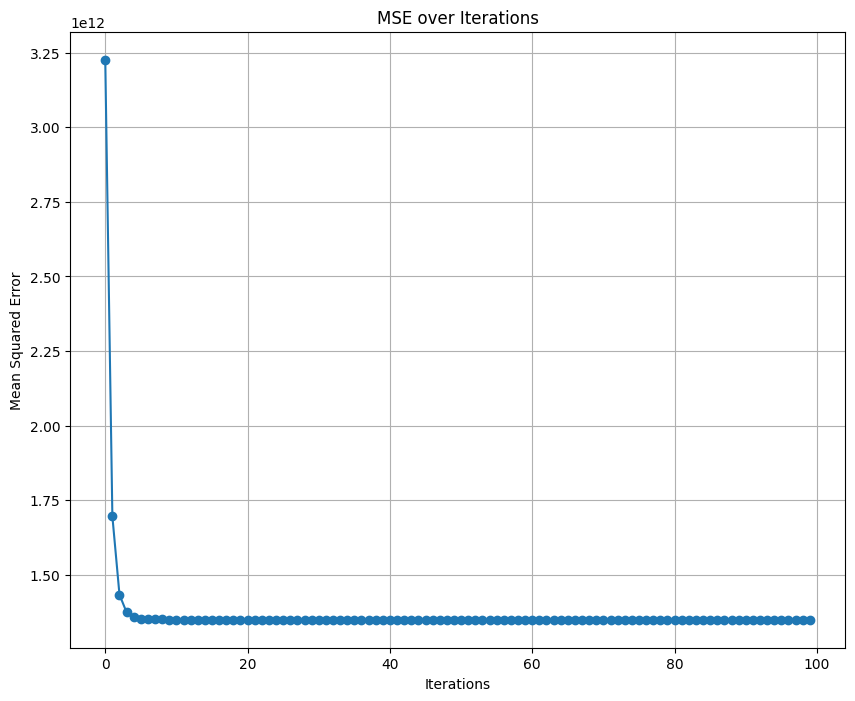

In [3]:
# Initialize the SGDRegressor with warm_start=True
sgd_regressor = SGDRegressor(max_iter=1, tol=None, warm_start=True, eta0=0.01, random_state=42)

# List to store the mean squared errors
mse_list = []

# Manually iterate and update the model
for _ in range(100):
    sgd_regressor.partial_fit(X_train, y_train)
    y_pred = sgd_regressor.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mse_list.append(mse)

# Plotting the MSE over iterations
plt.figure(figsize=(10, 8))
plt.plot(mse_list, marker='o')
plt.title('MSE over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

-The MSE drops sharply within the first few iterations, which indicates that the model is learning and improving quickly at the start.

-After the initial descent, the MSE levels off and remains relatively flat. This suggests that the model has reached a point of diminishing returns, where additional iterations do not lead to significant improvements in MSE.

-The plateau in the MSE plot indicates that the model might have reached its capability given the current features and hyperparameters. Further improvement might require changes in the model complexity, feature engineering, or hyperparameters tuning.

-The final MSE value appears to be relatively high, which could mean that the model's predictions are still quite far from the true values. This might not be the best model, or additional features and tuning may be needed to improve performance.

The plot of actual vs predicted values:

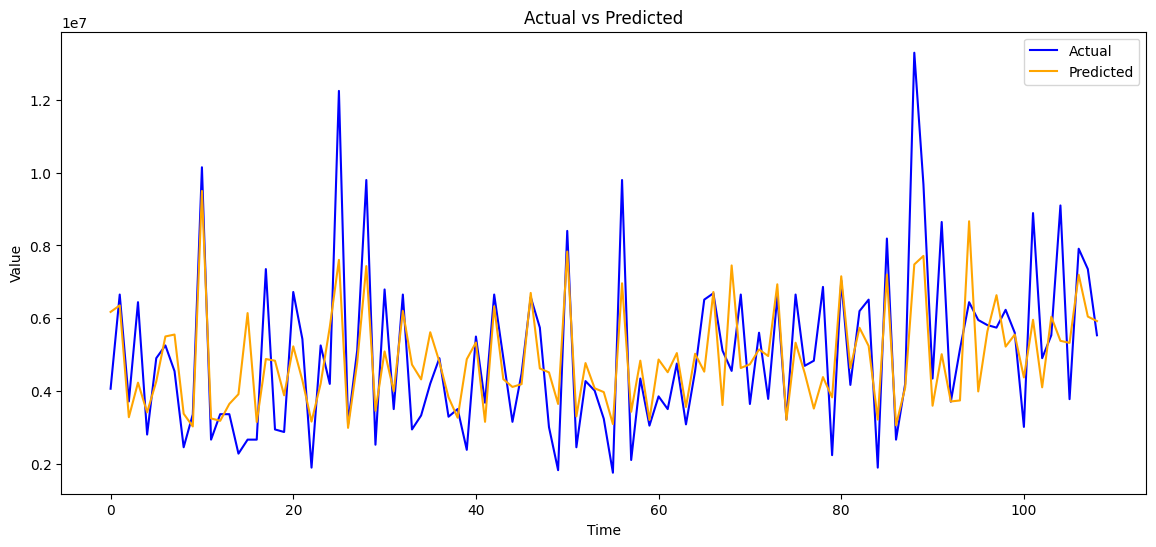

In [5]:
import matplotlib.pyplot as plt

# Assume 'time' is an array or a list that represents the time or sequence order
# and 'y_test' and 'y_pred' are the actual and predicted values, respectively.

time = np.arange(len(y_test))  # Replace with your actual time sequence if available

plt.figure(figsize=(14, 6))

# Plot actual values
plt.plot(time, y_test, label='Actual', color='blue')

# Plot predicted values
plt.plot(time, y_pred, label='Predicted', color='orange')

# Labeling the plot
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.show()


The "Actual vs Predicted" plot suggests that the model's predictions are not very accurate. While it does capture some of the overall trends in the data, there are clear discrepancies between the actual and predicted values:

1. There are several points where the predicted values either significantly overestimate or underestimate the actual values, which is evident from the divergence of the two lines.

2. The prediction line does not consistently follow the actual line, indicating that the model is not capturing the underlying pattern effectively across the entire dataset.

3. The presence of large spikes in the actual values that are not mirrored in the predictions could indicate that the model is missing key features or interactions that explain the variance in the data.